In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
%pip install ultralytics pycocotools scikit-learn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [8]:
import os
from glob import glob

import cv2
import numpy as np
from sklearn.utils import shuffle
import yaml
from ultralytics import YOLO


#Instance
model = YOLO("yolov8l-seg.yaml")#build a model from YAML
model = YOLO("yolov8l-seg.pt") #Transfer the weights from a pretrained model (recommended for training)

with open("/content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/yolov8_l_dataset/data.yaml",'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])


#Define a project --> Destination directory for all results
project = "/content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/yolov8_l_dataset/results"
#Define subdirectory for this specific training
name = "70_epochs-"


ABS_PATH = os.getcwd()

#Train the model
results = model.train(
    data = os.path.join(ABS_PATH, "/content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/yolov8_l_dataset/data.yaml"),
    project = project,
    name = name,
    epochs = 10,
    patience = 0 , #setting patience=0 to disable early stopping,
    batch = 15,
    imgsz=512
)

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/yolov8_l_dataset/data.yaml, epochs=10, time=None, patience=0, batch=15, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/yolov8_l_dataset/results, name=70_epochs-2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=N

train: Scanning /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/data/train_data/512x512/labels... 783 images, 3 backgrounds, 0 corrupt: 100%|██████████| 786/786 [06:09<00:00,  2.13it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/data/train_data/512x512/images/TF100_CS39_20170829_205107.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/data/train_data/512x512/images/TF100_CS39_20170829_205527.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/data/train_data/512x512/images/TF100_CS39_20170829_210528.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/data/train_data/512x512/images/TF101_233_20170830_103930.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/data/train_data/512x512/images/TF101_233_20170830_104736.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/data/train_data/512x512/images/TF101_233_20170830_105253.jpg

train: New cache created: /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/data/train_data/512x512/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/data/val_data/512x512/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:48<00:00,  2.05it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/data/val_data/512x512/images/TF22_C104P65_20170708_161947.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/data/val_data/512x512/images/TF23_C108P69_20170709_121509.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/data/val_data/512x512/images/TF23_C108P69_20170709_121754.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/data/val_data/512x512/images/TF23_C108P69_20170709_122110.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/data/val_data/512x512/images/TF23_C108P69_20170709_122531.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/data/val_data/512x512/images/TF23_C108P69_20170709_123926.jpg: 3 dupli

val: New cache created: /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/data/val_data/512x512/labels.cache
Plotting labels to /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/yolov8_l_dataset/results/70_epochs-2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.00046875), 116 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/yolov8_l_dataset/results/70_epochs-2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      13.1G      3.845      5.419       3.57     0.9297       1402        512: 100%|██████████| 53/53 [02:27<00:00,  2.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.55s/it]

                   all        100      24014     0.0216     0.0189    0.00917    0.00248   0.000844   0.000999   0.000423   0.000201



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      13.5G      3.801      4.548       2.28     0.8651        542        512: 100%|██████████| 53/53 [01:38<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.97s/it]

                   all        100      24014       0.01     0.0125    0.00512     0.0014     0.0066    0.00825    0.00336    0.00274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      11.9G      3.808      4.598      2.295     0.8487        680        512: 100%|██████████| 53/53 [01:38<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.83s/it]


                   all        100      24014     0.0271     0.0329      0.014    0.00385     0.0149     0.0114    0.00518    0.00455

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      11.7G       3.81      4.573       2.25     0.8427        777        512: 100%|██████████| 53/53 [01:40<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.64s/it]

                   all        100      24014     0.0271     0.0329      0.014    0.00385     0.0149     0.0114    0.00518    0.00455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      10.2G      3.842      4.535      2.344     0.8423        640        512: 100%|██████████| 53/53 [01:38<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.78s/it]


                   all        100      24014    0.00183    0.00229   0.000943   0.000274          0          0          0          0

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      14.4G      3.769       4.46      2.302     0.8381        525        512: 100%|██████████| 53/53 [01:41<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.66s/it]

                   all        100      24014      0.117     0.0286     0.0262    0.00823    0.00447    0.00558    0.00228    0.00209



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      13.1G        3.7      4.461      2.184     0.8393        958        512: 100%|██████████| 53/53 [01:38<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.84s/it]

                   all        100      24014       0.16     0.0326      0.032    0.00859     0.0156    0.00541    0.00269    0.00241



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10        13G      3.665      4.458      2.162     0.8293        599        512: 100%|██████████| 53/53 [01:37<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.85s/it]

                   all        100      24014      0.137     0.0351     0.0298    0.00782     0.0579     0.0197     0.0112    0.00997



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      10.2G      3.622      4.331      2.136      0.834       1026        512: 100%|██████████| 53/53 [01:38<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.70s/it]


                   all        100      24014      0.174     0.0353     0.0319    0.00847     0.0542     0.0202     0.0113     0.0101

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      14.8G      3.608      4.383      2.108     0.8275        544        512: 100%|██████████| 53/53 [01:37<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.72s/it]

                   all        100      24014      0.142     0.0385     0.0328    0.00886     0.0248    0.00783    0.00432    0.00384



10 epochs completed in 0.342 hours.
Optimizer stripped from /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/yolov8_l_dataset/results/70_epochs-2/weights/last.pt, 92.3MB
Optimizer stripped from /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/yolov8_l_dataset/results/70_epochs-2/weights/best.pt, 92.3MB

Validating /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/yolov8_l_dataset/results/70_epochs-2/weights/best.pt...
Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45,912,659 parameters, 0 gradients, 220.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:15<00:00,  3.97s/it]


                   all        100      24014      0.173     0.0352     0.0318     0.0085     0.0547     0.0199     0.0113     0.0101
Speed: 0.2ms preprocess, 18.5ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/yolov8_l_dataset/results/70_epochs-2


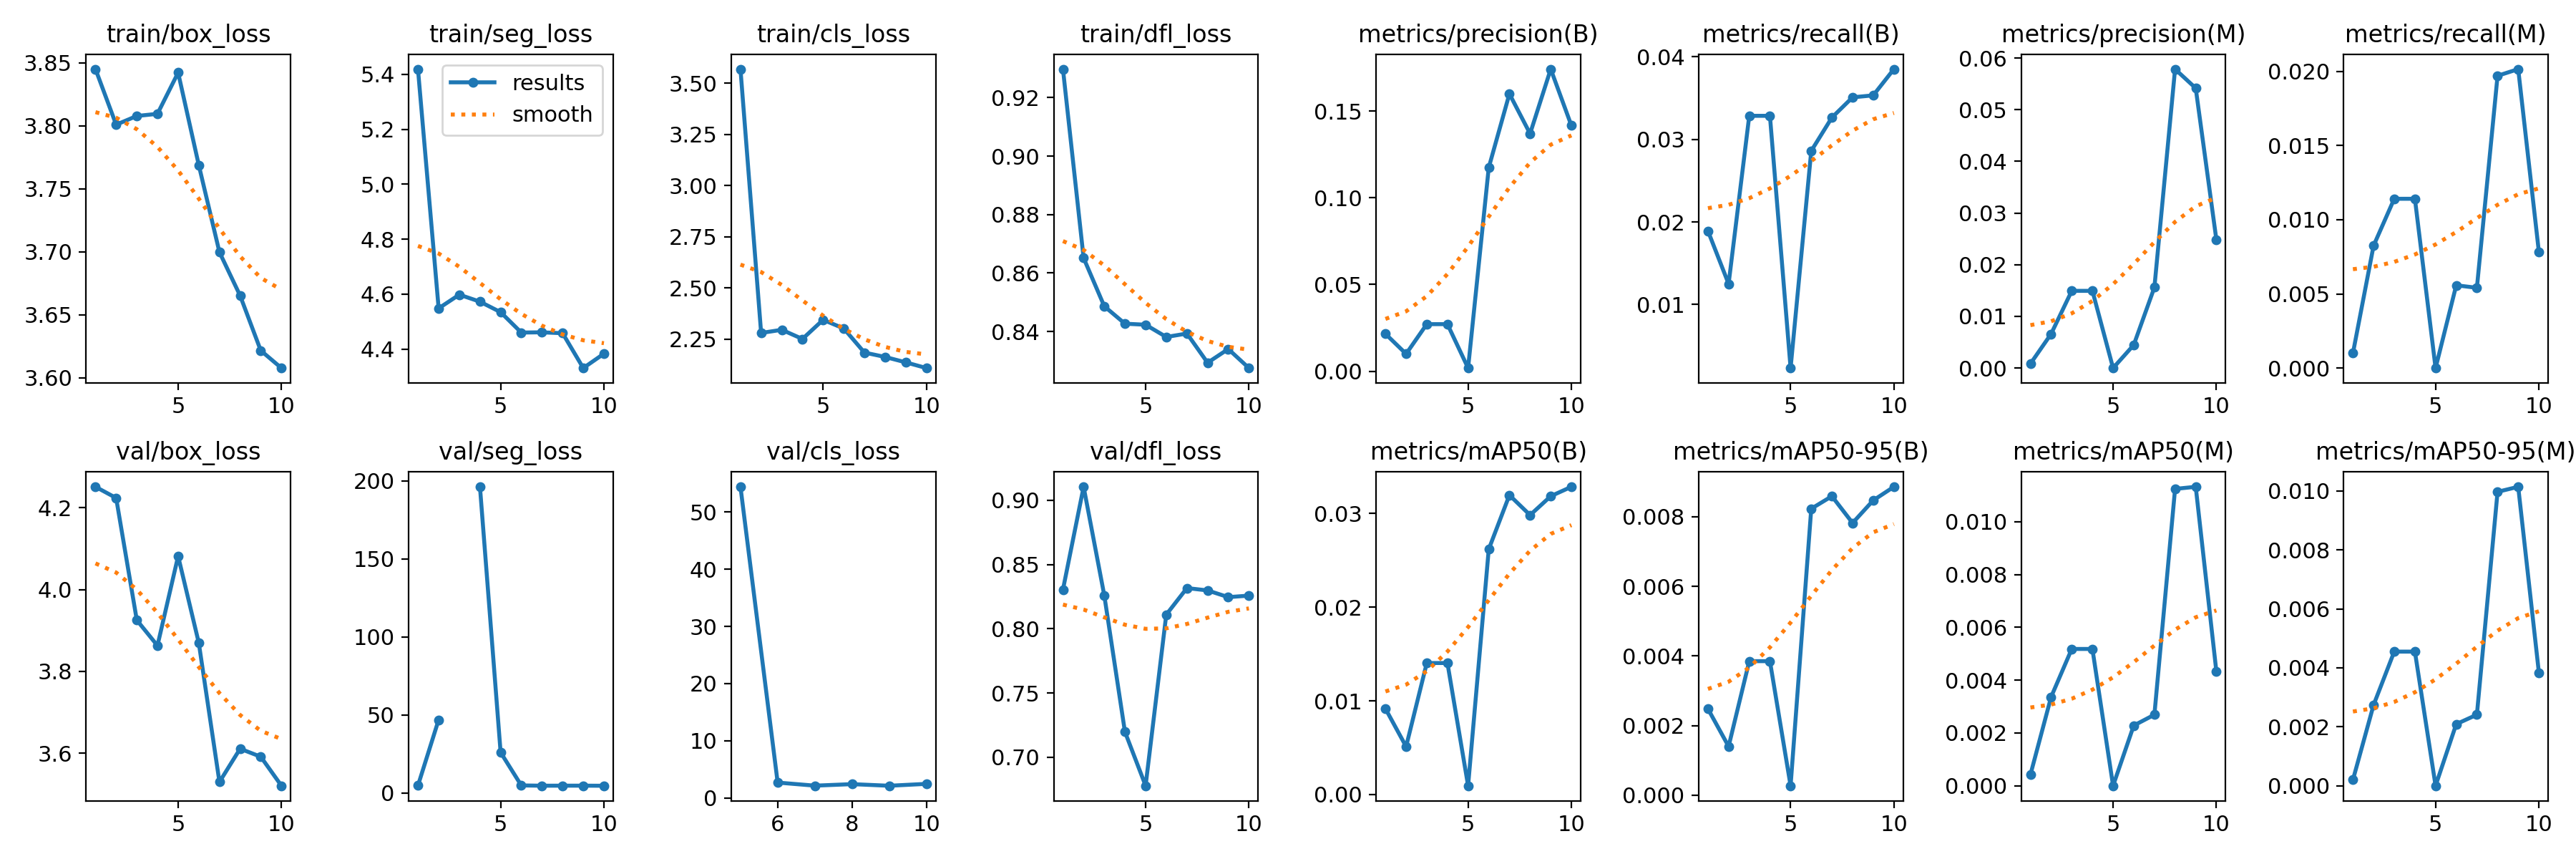

In [9]:
from IPython.display import Image
Image("/content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/yolov8_l_dataset/results/70_epochs-2/results.png")

# Inference

In [10]:
inference_model = YOLO('/content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/yolov8_l_dataset/results/70_epochs-2/weights/best.pt')

In [12]:
import matplotlib.pyplot as plt
inference_img_path = "/content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/data/test_data/512x512/images/TF30_W13B1_20170724_144112.jpg"
inference_result = inference_model.predict(inference_img_path,conf=0.7,visualize=False,save=True)

inference_result_array = inference_result[0].plot()
plt.figure(figsize=(9,9))
plt.imshow(inference_result_array)



image 1/1 /content/drive/MyDrive/Colab Notebooks/sem4/project2/yolo_code2/data/test_data/512x512/images/TF30_W13B1_20170724_144112.jpg: 512x512 (no detections), 90.2ms
Speed: 6.2ms preprocess, 90.2ms inference, 0.9ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/segment/predict


In [ ]:
inference_img_path = "yolov8_l_dataset/val/images/human_cerebellum_6.png"
inference_result = inference_model.predict(inference_img_path,conf=0.7,visualize=False,save=True)

inference_result_array = inference_result[0].plot()
plt.figure(figsize=(9,9))
plt.imshow(inference_result_array)

In [ ]:
inference_img_path = "yolov8_l_dataset/val/images/human_epiglottis_4.png"
inference_result = inference_model.predict(inference_img_path,conf=0.7,visualize=False,save=True)

inference_result_array = inference_result[0].plot()
plt.figure(figsize=(9,9))
plt.imshow(inference_result_array)

In [ ]:
inference_img_path = "yolov8_l_dataset/val/images/human_jejunum_02.png"
inference_result = inference_model.predict(inference_img_path,conf=0.7,visualize=False,save=True)

inference_result_array = inference_result[0].plot()
plt.figure(figsize=(9,9))
plt.imshow(inference_result_array)

In [ ]:
inference_img_path = "yolov8_l_dataset/val/images/human_kidney_01.png"
inference_result = inference_model.predict(inference_img_path,conf=0.7,visualize=False,save=True)

inference_result_array = inference_result[0].plot()
plt.figure(figsize=(9,9))
plt.imshow(inference_result_array)